Importing pandas library

In [2]:
import pandas as pd

loading the train and test data to work with them

In [3]:
train=pd.read_csv('fashion-mnist_train.csv')
test=pd.read_csv('fashion-mnist_test.csv')

load the head of data to see what we want to struggle with it

In [24]:
print(train.head())
print(test.head())

   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         

overall view on data columns to see if there is a problem or not. In other words we can say evaluating preproccessing requirement by checking availability of null or missing data and also categorial ones which Machine learning models can't work with and handle them

In [25]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB
None


more precise and apparent calculation and preview of the number of missing values in each column ,if it is available, by chaining of the .isnull() and .sum() methods

In [26]:
print(train.isnull().sum())
print(test.isnull().sum())

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64
label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64


separating the labels from the training features in both train and test files

In [4]:
X_train=train.loc[:, train.columns != 'label']
y_train=train['label']

X_test=test.loc[:, test.columns != 'label']
y_test=test['label']

print(X_train, y_train, X_test, y_test)

       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       5       0   
3           0       0       0       1       2       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
59995       0       0       0       0       0       0       0       0       0   
59996       0       0       0       0       0       0       0       0       0   
59997       0       0       0       0       0       0       0       0       0   
59998       0       0       0       0       0       0       0       0       0   
59999       0       0       0       0       0       0       0       0       0   

       pixel10  ...  pixel7

standardization of the data which is needed for proper answer in many models

In [5]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


performing PCA on the training data without using built-in PCA function but mine

because of some problems, I prefered to not perform standardization on data but the final result and comparison is not so different and it is negligible. Also I put related code in the needed place as comment to inform the activity which may be applicable here.

In [29]:
import numpy as np

def PCA(X, components_num):
    
    ###principal component analysis steps:

    ##1 mean Centering the data
    
    #Subtract the mean of each variable from the dataset so that the dataset should be centered on the origin.
    #it is needed for calculating the covariance matrix as well as possible.
    
    X_mean = X - np.mean(X, axis = 0)
     
    ##2 Calculating the Covariance Matrix

    #The covariance matrix is a square matrix indicating the covariance of the elements with each other.
    #we set rowvar, which its default is True, to False to get the covariance matrix in the required dimensions.

    cov_mat = np.cov(X_mean, rowvar = False)
     
    ##3 Computing the eigenvalues and eigenvectors for the calculated Covariance matrix

    #The Eigenvectors of the Covariance matrix are Orthogonal to each other and each vector represents a principal axis.
    
    #A Higher Eigenvalue corresponds to a higher variability.
    #Hence the principal axis with the higher Eigenvalue will be an axis capturing higher variability in the data.

    eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)
     
    ##4 Sorting Eigenvalues in descending order along with their corresponding Eigenvector

    #each column in the Eigen vector-matrix corresponds to a principal component, 
    #so arranging them in descending order of their Eigenvalue will automatically 
    #arrange the principal component in descending order of their variability.
    
    #np.argsort returns an array of indices of the same shape.
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]

    ##5  Selecting a subset from the rearranged Eigenvalue matrix

    #number of components means our final data should be reduced to how many variables according to our need.
    #in other view we can say that complete dataset can be expressed in terms of principal components.
    #Usually, more than 90% of the variance is explained by two/three principal components.

    eigenvector_subset = sorted_eigenvectors[:,0:components_num]
     
    ##6 Transforming the data

    #by having a dot product between the Transpose of the Eigenvector subset and the Transpose of the mean-centered data.

    X_reduced = np.dot(eigenvector_subset.transpose(), X_mean.transpose()).transpose()
     
    return X_reduced

In [30]:
#Applying PCA function for training dataset
train_mat_reduced=PCA(X_train, 2)
#train_mat_reduced = PCA(X_train_scaled, 2)

#Creating a Pandas DataFrame of reduced Dataset
train_principal_df=pd.DataFrame(train_mat_reduced, columns = ['train-PC1','train-PC2'])

#Concat it with labels to create a complete Dataset
train_principal_df=pd.concat([train_principal_df, pd.DataFrame(y_train)], axis = 1)

In [31]:
#we can recognize number of components by checking the plot of the variance explained by each PC in this way
#but here because of the function which I made for PCA, its better to consider it 2 as well as most cases.

# explained_variance=(eig_values / np.sum(eig_values))*100
# plt.figure(figsize=(8,4))
# plt.bar(range(4), explained_variance, alpha=0.6)
# plt.ylabel('Percentage of explained variance')
# plt.xlabel('Dimensions')

making a plot to see the result

<AxesSubplot:xlabel='train-PC1', ylabel='train-PC2'>

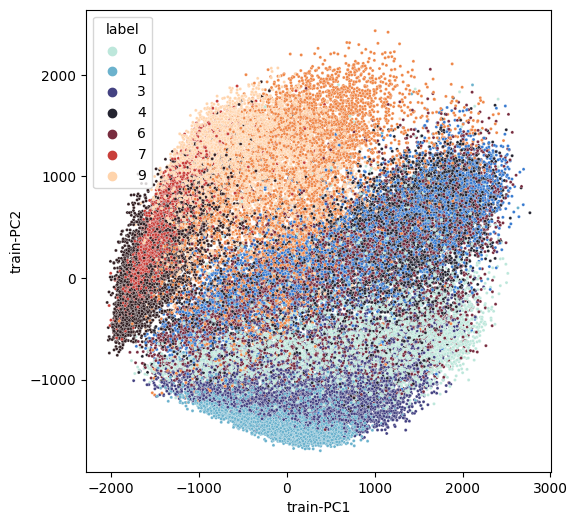

In [32]:
import seaborn as sb
import matplotlib.pyplot as plt
 
plt.figure(figsize = (6,6))
sb.scatterplot(data= train_principal_df , x = 'train-PC1', y = 'train-PC2' , hue = 'label' , s = 5 , palette= 'icefire')

we have to do PCA also on the test data to have same set of features on both of them and prevent any problem for future training of models. 

In [33]:
#Applying PCA function for test dataset
test_mat_reduced=PCA(X_test, 2)
#test_mat_reduced = PCA(X_test_scaled, 2)

#Creating a Pandas DataFrame of reduced Dataset
test_principal_df=pd.DataFrame(test_mat_reduced, columns = ['test-PC1','test-PC2'])

#Concat it with labels to create a complete Dataset
test_principal_df=pd.concat([test_principal_df, pd.DataFrame(y_test)], axis = 1)

<AxesSubplot:xlabel='test-PC1', ylabel='test-PC2'>

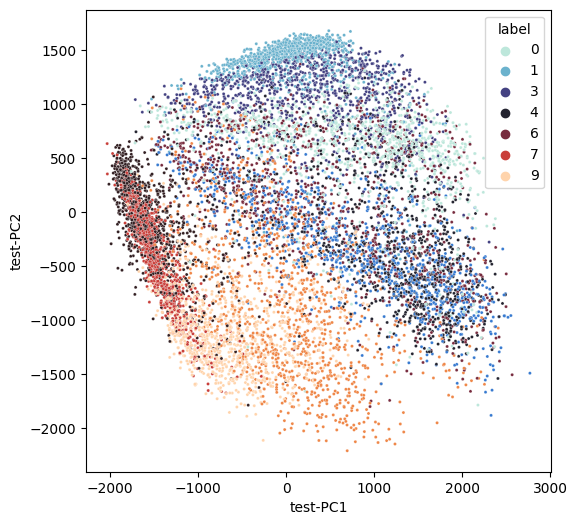

In [34]:
plt.figure(figsize = (6,6))
sb.scatterplot(data= test_principal_df , x = 'test-PC1', y = 'test-PC2' , hue = 'label' , s = 5 , palette= 'icefire')

now we check the result of built-in PCA function of sklearn library

first for train set

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
#built_in_train_mat_reduced=pca.fit_transform(X_train)
built_in_train_mat_reduced = pca.fit_transform(X_train_scaled)

#Creating a Pandas DataFrame of reduced Dataset
built_in_train_principal_df=pd.DataFrame(-built_in_train_mat_reduced, columns=['built_in-train_PC1', 'built_in-train_PC2'])

#Concat it with labels to create a complete Dataset
built_in_train_principal_df=pd.concat([built_in_train_principal_df, pd.DataFrame(y_train)], axis = 1)


making a plot to see the result and compare

<AxesSubplot:xlabel='built_in-train_PC1', ylabel='built_in-train_PC2'>

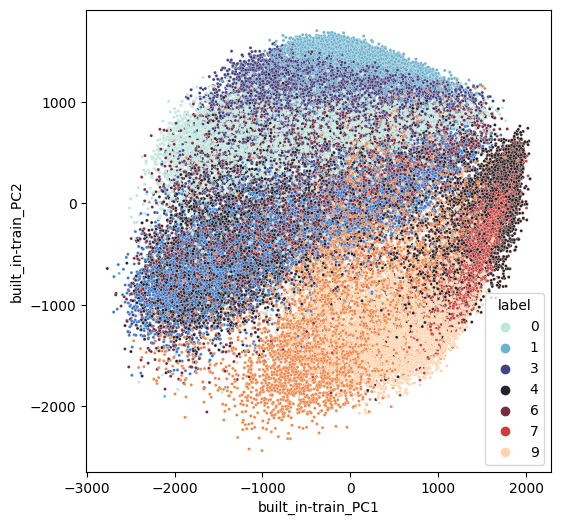

In [36]:
plt.figure(figsize = (6,6))
sb.scatterplot(data=built_in_train_principal_df, x='built_in-train_PC1', y='built_in-train_PC2', hue='label', s=5, palette='icefire')

next the test one

In [37]:
from sklearn.decomposition import PCA

#because our data was seperated to test and train before we perform PCA, we have to fit_transform test one as train here not transform.
pca = PCA(n_components=2)
#built_in_test_mat_reduced=pca.fit_transform(X_test)
built_in_test_mat_reduced = pca.fit_transform(X_test_scaled)

#Creating a Pandas DataFrame of reduced Dataset
built_in_test_principal_df=pd.DataFrame(built_in_test_mat_reduced, columns=['built_in-test_PC1', 'built_in-test_PC2'])

#Concating it with labels to create a complete Dataset
built_in_test_principal_df=pd.concat([built_in_test_principal_df, pd.DataFrame(y_test)], axis = 1)

and its plotting

<AxesSubplot:xlabel='built_in-test_PC1', ylabel='built_in-test_PC2'>

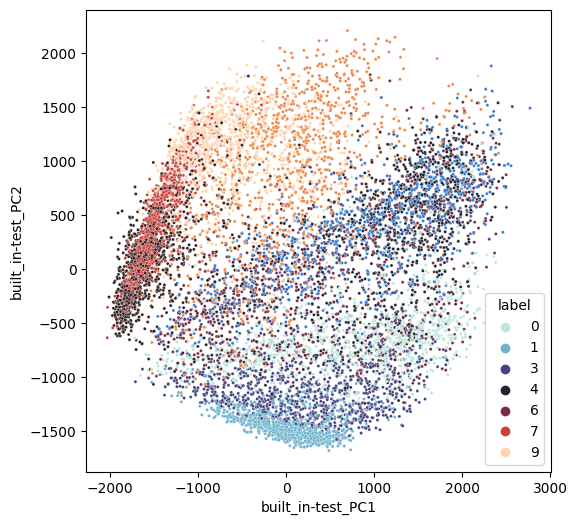

In [38]:
plt.figure(figsize = (6,6))
sb.scatterplot(data=built_in_test_principal_df, x='built_in-test_PC1', y='built_in-test_PC2', hue='label', s=5, palette='icefire')

these two different way of performing PCA (the from scratch one in comparison with built-in PCA function) had similar results, but there may be slight differences due to variations in the implementation and numerical precision.

in performing PCA from scratch, as you can see, I started it by standardizing the data and computing the covariance matrix. Then, I found the eigenvectors and eigenvalues of the covariance matrix, sorted them in descending order of eigenvalues, and used them to transform the data into the principal component space. 

On the other hand, the built-in PCA function called a pre-built function that taked care of all these steps for me. I simply provided the input data and specify the number of components I want to retain, and the function returned the transformed data.

SVM cross validation check

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

svc1= SVC(kernel="linear")
svc2= SVC(kernel="poly")
svc3= SVC(kernel="rbf")

accuracy1= cross_val_score(svc1,built_in_train_mat_reduced,y_train,cv=5)
accuracy2= cross_val_score(svc2,built_in_train_mat_reduced,y_train,cv=5)
accuracy3= cross_val_score(svc3,built_in_train_mat_reduced,y_train,cv=5)

print("Linear model Train Score:",np.mean(accuracy1))
print("polynomial model Train Score:",np.mean(accuracy2))
print("radial basis function model Train Score:",np.mean(accuracy3))

so the best one as the result of train scores show is the last one, radial basis function model.

I tried another way (below code) to reduce the time of running to chose the best kernel mode but as the upper one, It didn't work fast!

In [ ]:
# grid={
#     'C':[0.01,0.1,1,10],
#     'kernel' : ["linear","poly","rbf"],
#     'degree' : [1,3,5,7],
#     'gamma' : [0.01,1]
#     }

# svm=SVC()
# svm_cv=GridSearchCV(svm, grid, cv=5)
# svm_cv.fit(x_train_scaled,y_train)
# print("Best Parameters:",svm_cv.best_params_)
# print("Train Score:",svm_cv.best_score_)

I also tried RandomizedSearchCV to decrease the amount of data for cross validation we need but as others it got a lot of time to complete running and because of time shortage I ignored waiting for its result same as the previous ones and according to the size of data and its enormous calculations to do for cross validation and examing these different kernel types it was rational to me. 

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.svm import SVC
# from scipy.stats import uniform

##defining the SVM model
# svm= SVC()

##defining the hyperparameter space
# hyperparameters={
#     'C': uniform(loc=0, scale=10),
#     'kernel': ['linear', 'poly', 'rbf'],
#     'gamma': ['scale', 'auto'] + list(uniform(loc=0, scale=1).rvs(10))
#     }

##defining the randomized search cross-validation
# random_search= RandomizedSearchCV(svm, hyperparameters, cv=5, n_iter=50, n_jobs=-1, random_state=42)

##fitting the randomized search cross-validation
# random_search.fit(x_train_scaled, y_train)

##printing the best hyperparameters
# print(random_search.best_params_)

as I prefered my first try more to work with, I chose my other ways to be as comment for reducing the time of running all cells if you want.

so after choosing the better kernel mode, we have to fit data on it to classify and after that get classification report including 4 evaluation metrics accuracy, precision, recall and f1 score Along with a confusion matrix for both training and test data.

In [47]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC

SVM_classifier= SVC(kernel="rbf")
SVM_classifier.fit(built_in_train_mat_reduced, y_train)

SVM_y_pred_train= SVM_classifier.predict(built_in_train_mat_reduced)
print(confusion_matrix(y_train, SVM_y_pred_train))
print(classification_report(y_train, SVM_y_pred_train))

SVM_y_pred_test= SVM_classifier.predict(built_in_test_mat_reduced)
print(confusion_matrix(y_test, SVM_y_pred_test))
print(classification_report(y_test, SVM_y_pred_test))

[[5429    2   55  148   10    2  343    0   11    0]
 [  11 5860    2  110    8    0    7    0    2    0]
 [  49    1 5200   51  449    1  243    0    6    0]
 [  98    9   29 5620  148    0   87    0    9    0]
 [   7    4  323  163 5259    0  238    0    6    0]
 [   1    0    0    1    0 5854    0  118    9   17]
 [ 624    6  374  131  310    0 4538    0   16    1]
 [   0    0    0    0    0   56    0 5839    6   99]
 [   7    1   11   22   17    6   22   10 5903    1]
 [   1    0    0    0    0   25    0  154    0 5820]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      6000
           1       1.00      0.98      0.99      6000
           2       0.87      0.87      0.87      6000
           3       0.90      0.94      0.92      6000
           4       0.85      0.88      0.86      6000
           5       0.98      0.98      0.98      6000
           6       0.83      0.76      0.79      6000
           7       0.95      0.97   

bayes model cross validation (it doesn't need scaled data)

In [41]:
import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB

bayes=MultinomialNB()

bayes_accuracy= cross_val_score(bayes,built_in_train_mat_reduced,y_train,cv=5)

print("bayes model Train Score:",np.mean(bayes_accuracy))

bayes model Train Score: 0.6652


bayes model training, classification, prediction and its report include 4 evaluation metrics accuracy, precision, recall and f1 score Along with a confusion matrix for both training and test data.

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

bayes_classifier=MultinomialNB()
bayes_classifier.fit(built_in_train_mat_reduced, y_train)

bayes_y_pred_train= bayes_classifier.predict(built_in_train_mat_reduced)
print(confusion_matrix(y_train, bayes_y_pred_train))
print(classification_report(y_train, bayes_y_pred_train))

bayes_y_pred_test= bayes_classifier.predict(built_in_test_mat_reduced)
print(confusion_matrix(y_test, bayes_y_pred_test))
print(classification_report(y_test, bayes_y_pred_test))

[[4739    7   38  707   28    0  383    0   98    0]
 [  69 5330   67  440   22    0   65    0    7    0]
 [  29    2 3550   68 1675    0  536    0  140    0]
 [ 204   75   10 5289  109    0  302    0   11    0]
 [  13   11 1113  833 3772    0  203    0   55    0]
 [   4    0    9    6    5  899   43 3122   52 1860]
 [1338    8  898  448 2098    0  968    0  241    1]
 [   0    0    0    0    0  144    0 5507    8  341]
 [  41    3   12  285  436   18  276   49 4878    2]
 [   0    0    6    4    1  298   78  619    6 4988]]
              precision    recall  f1-score   support

           0       0.74      0.79      0.76      6000
           1       0.98      0.89      0.93      6000
           2       0.62      0.59      0.61      6000
           3       0.65      0.88      0.75      6000
           4       0.46      0.63      0.53      6000
           5       0.66      0.15      0.24      6000
           6       0.34      0.16      0.22      6000
           7       0.59      0.92   

KNN model cross validtion

In [43]:
from sklearn.neighbors import KNeighborsClassifier

KNN=KNeighborsClassifier()

param_grid={'n_neighbors': np.arange(1, 10)}

KNN_cv=GridSearchCV(KNN, param_grid, cv=5)

KNN_cv.fit(built_in_train_mat_reduced,y_train)

print(KNN_cv.best_params_)

print("Train Score:",KNN_cv.best_score_)

{'n_neighbors': 4}
Train Score: 0.8561


KNN model training, classification, prediction and its report include 4 evaluation metrics accuracy, precision, recall and f1 score Along with a confusion matrix for both training and test data.

In [49]:
from sklearn.metrics import classification_report, confusion_matrix

KNN_classifier=KNeighborsClassifier(n_neighbors=4)
KNN_classifier.fit(built_in_train_mat_reduced, y_train)

KNN_y_pred_train= KNN_classifier.predict(built_in_train_mat_reduced)
print(confusion_matrix(y_train, KNN_y_pred_train))
print(classification_report(y_train, KNN_y_pred_train))

KNN_y_pred_test= KNN_classifier.predict(built_in_test_mat_reduced)
print(confusion_matrix(y_test, KNN_y_pred_test))
print(classification_report(y_test, KNN_y_pred_test))

[[5656    2   49   51   19    0  200    1   20    2]
 [  18 5895   10   49    6    0   20    0    1    1]
 [  86    1 5394   31  251    0  228    1    8    0]
 [ 191   26   32 5535   93    0  120    0    3    0]
 [  25    6  509  160 5025    0  269    0    6    0]
 [   4    0    1    3    0 5609   18  198    6  161]
 [ 938    6  577   81  414    0 3965    0   18    1]
 [   0    0    0    0    0   15    3 5886    0   96]
 [  30    1   49   23   31   10   76   31 5738   11]
 [   0    0    0    0    0   17    6  183    0 5794]]
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      6000
           1       0.99      0.98      0.99      6000
           2       0.81      0.90      0.85      6000
           3       0.93      0.92      0.93      6000
           4       0.86      0.84      0.85      6000
           5       0.99      0.93      0.96      6000
           6       0.81      0.66      0.73      6000
           7       0.93      0.98   

MLP model cross validtion 

In [ ]:
# import keras
# from keras.models import Sequential
# from keras.layers import Dense
# from scikeras.wrappers import KerasClassifier

# #Defining the MLP model
# def create_model(num_layers=2, num_neurons=64, learning_rate=0.001, activation='relu'):
#     model=Sequential()
#     model.add(Dense(num_neurons, input_dim=X_train.shape[1], activation=activation))
#     for i in range(num_layers-1):
#         model.add(Dense(num_neurons, activation=activation))
#     model.add(Dense(1, activation='sigmoid'))
#     optimizer = keras.optimizers.Adam(learning_rate)
#     model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
#     return model

# #Defining the hyperparameters to search over
# param_grid = {
#     'num_layers': [1, 2, 3],
#     'num_neurons': [32, 64, 128],
#     'learning_rate': [0.001, 0.01, 0.1],
#     'activation': ['relu', 'sigmoid'],
#     'batch_size': [16, 32, 64],
#     'epochs': [50, 100],
#     }

# #Performing 5-fold cross-validation to find the best hyperparameters
# model=KerasClassifier(build_fn=create_model)
# grid_search=GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
# grid_search.fit(X_train_scaled, y_train)

# #Printing the best hyperparameters
# print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

# #Training the MLP model with the best hyperparameters
# best_model=create_model(num_layers=grid_search.best_params_['num_layers'], 
#                         num_neurons=grid_search.best_params_['num_neurons'],
#                         learning_rate=grid_search.best_params_['learning_rate'],
#                         activation=grid_search.best_params_['activation'])
# best_model.fit(X_train, y_train, epochs=grid_search.best_params_['epochs'], 
#                batch_size=grid_search.best_params_['batch_size'], validation_split=0.2)


In [61]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold

#Defining the parameter grid for hyperparameter tuning
param_grid={
    'hidden_layer_sizes': [100,(50,100),(10, 50, 100)],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'activation': ['relu', 'identity', 'logistic', 'tanh'],
    'batch_size': [16, 32, 64],
    'max_iter': [50, 100],
    }

#Creating the MLP classifier
mlp=MLPClassifier()

#Creating the cross-validation object
cv=KFold(n_splits=5)

#Performing grid search with cross-validation
grid_search = GridSearchCV(mlp, param_grid=param_grid, cv=cv, n_jobs=-1)
grid_search.fit(built_in_train_mat_reduced, y_train)

# Print the best hyperparameters and the corresponding accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

MLP_classifier=mlp()
MLP_classifier.fit(built_in_train_mat_reduced, y_train)

MLP_y_pred_train= MLP_classifier.predict(built_in_train_mat_reduced)
print(confusion_matrix(y_train, MLP_y_pred_train))
print(classification_report(y_train, MLP_y_pred_train))

MLP_y_pred_test= MLP_classifier.predict(built_in_test_mat_reduced)
print(confusion_matrix(y_test, MLP_y_pred_test))
print(classification_report(y_test, MLP_y_pred_test))

There are different activation functions that can be used in the MLP model, and each has its own characteristics and benefits. Here are some differences between the activation functions used here or may be we could use:

- `relu` (rectified linear unit): This one is a popular activation function that is simple and computationally efficient. It returns the input value if it's positive, and 0 if it's negative. This helps the model to learn faster and avoid the vanishing gradient problem. However, it may cause the model to be less sensitive to small changes in the input.

- `sigmoid`: This is a common activation function that maps any input value to a value between 0 and 1. It's useful for binary classification problems where the output should be a probability of belonging to one class or the other. However, it may cause the gradient to vanish when the input is too large or too small, which can slow down learning.

- `tanh` (hyperbolic tangent): This is similar to the sigmoid function, but it maps any input value to a value between -1 and 1. It's useful for classification problems where the output can be negative or positive. However, it may also cause the gradient to vanish when the input is too large or too small.

Overall, the choice of activation function depends on the specific problem and data being used. It's important to experiment with different activation functions and see which one works best for the given task as I did here.

It's difficult to make a direct comparison between the performance of an MLP model and other machine learning algorithms like KNN, bayes, and SVM without knowing the specific problem and data being used. Each algorithm has its own strengths and weaknesses, and may perform better or worse depending on the task at hand.

In general, MLP models are known for their ability to learn complex patterns and relationships in data, and can often outperform simpler algorithms like KNN and Naive Bayes. SVMs, on the other hand, are known for their ability to handle high-dimensional data and can be effective for classification tasks with a clear boundary between classes.

Ultimately, the choice of algorithm depends on the specific problem, data, and resources available. It's important to experiment with different algorithms and evaluate their performance using appropriate metrics before making a final decision.